Introduction

Explain the columns: 

Read here: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf
 


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
weather_data = pd.read_csv('local_weather.csv')
weather_data.head()

,"STATION,""NAME"",""DATE"",""ACMH"",""ACSH"",""AWND"",""DAPR"",""FMTM"",""FRGT"",""MDPR"",""PGTM"",""PRCP"",""SNOW"",""SNWD"",""TAVG"",""TMAX"",""TMIN"",""TSUN"",""WDF1"",""WDF2"",""WDF5"",""WDFG"",""WSF1"",""WSF2"",""WSF5"",""WSFG"",""WT01"",""WT02"",""WT03"",""WT04"",""WT05"",""WT07"",""WT08"",""WT09"",""WT16"",""WT18"""
0,"USW00023230,""OAKLAND INTERNATIONAL AIRPORT, CA..."
1,"USW00023230,""OAKLAND INTERNATIONAL AIRPORT, CA..."
2,"USW00023230,""OAKLAND INTERNATIONAL AIRPORT, CA..."
3,"USW00023230,""OAKLAND INTERNATIONAL AIRPORT, CA..."
4,"USW00023230,""OAKLAND INTERNATIONAL AIRPORT, CA..."


The read_csv does not properly delimit the csv file (due the the " next to the comma). Lets read file line by line and replace the ".

In [131]:
weather_data = pd.read_csv("local_weather.csv", sep="\,").apply(lambda x: x.str.replace(r"\"",""))
weather_data.columns = weather_data.columns.str.replace(r"\"","")

weather_data.head()


C:\Users\masv\AppData\Local\Temp\ipykernel_25804\1799042372.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  weather_data = pd.read_csv("local_weather.csv", sep="\,").apply(lambda x: x.str.replace(r"\"",""))
C:\Users\masv\AppData\Local\Temp\ipykernel_25804\1799042372.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  weather_data = pd.read_csv("local_weather.csv", sep="\,").apply(lambda x: x.str.replace(r"\"",""))
C:\Users\masv\AppData\Local\Temp\ipykernel_25804\1799042372.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  weather_data.columns = weather_data.columns.str.replace(r"\"","")


,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
"""USW00023230",OAKLAND INTERNATIONAL AIRPORT,CA US,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
"""USW00023230",OAKLAND INTERNATIONAL AIRPORT,CA US,1960-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,
"""USW00023230",OAKLAND INTERNATIONAL AIRPORT,CA US,1960-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
"""USW00023230",OAKLAND INTERNATIONAL AIRPORT,CA US,1960-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
"""USW00023230",OAKLAND INTERNATIONAL AIRPORT,CA US,1960-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,


Lets see how many nan values there are in the dataset

<AxesSubplot:>

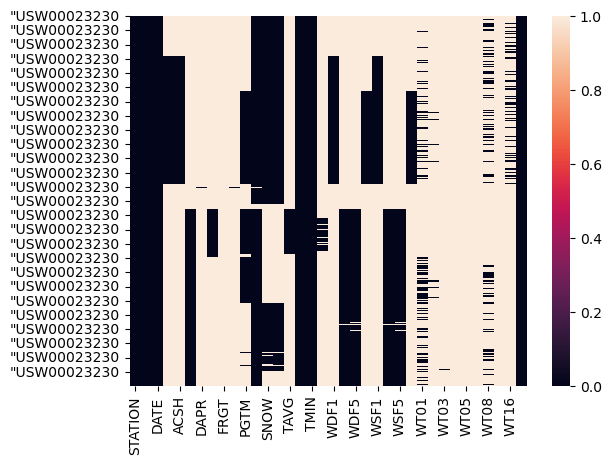

In [132]:
sns.heatmap(weather_data.isna())

As we can see, there are numerous columns that have a lot of missing values.

Lets take away many of the unecessary ones, and we will only keep: 

PRCP — total precipitation
TMAX — maximum daily temperature
TMIN — minimum daily temperature
SNOW — the total daily snowfall
SNWD — total snow depth on the ground

<AxesSubplot:ylabel='DATE'>

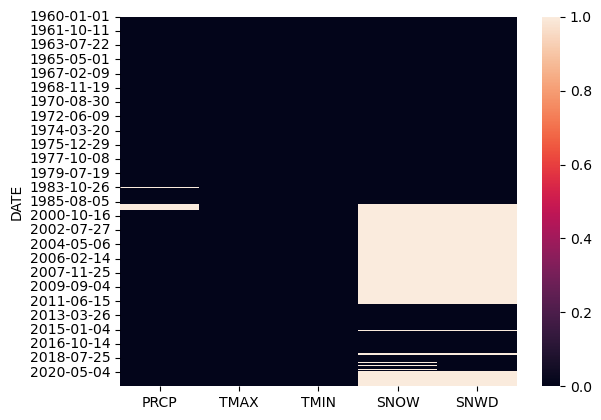

In [133]:
cleaned_weather_data = weather_data[['PRCP','TMAX','TMIN','SNOW','SNWD','DATE']]
cleaned_weather_data = cleaned_weather_data.set_index('DATE')
sns.heatmap(cleaned_weather_data.isna())

Quite a lot of missing values in SNOW and SNWD, lets see if we can extract any useful information from the columns

In [134]:
cleaned_weather_data[['SNOW','SNWD']].value_counts(dropna=False)

SNOW  SNWD
0.0   0.0     11352
NaN   NaN      5328
      0.0       151
0.0   NaN        27
1.0   0.0         1
dtype: int64

almost all values are 0 and many NaN. Lets drop the two columns!

In [135]:
cleaned_weather_data = cleaned_weather_data.drop(['SNOW','SNWD'],axis=1)

Now, lets look convert the index to datetime, and then look at PRCP and its missing values

In [136]:
cleaned_weather_data.index = pd.to_datetime(cleaned_weather_data.index)
cleaned_weather_data['PRCP'] = cleaned_weather_data['PRCP'].astype(float)
cleaned_weather_data['PRCP'].describe()

count    16578.00000
mean         0.04774
std          0.18704
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          4.53000
Name: PRCP, dtype: float64

In [137]:
cleaned_weather_data['PRCP'].isna().sum

281

Now, lets look at the two remaining columns, TMIN and TMAX. First, lets convert to numerical, and check how many values that are missing

In [138]:
cleaned_weather_data[['TMIN','TMAX']] = cleaned_weather_data[['TMIN','TMAX']].astype(float)
cleaned_weather_data[['TMIN','TMAX']].isna().sum()

TMIN    10
TMAX     9
dtype: int64

In [139]:
cleaned_weather_data[['TMIN','TMAX']].describe()

,TMIN,TMAX
count,16849.000000,16850.000000
mean,50.431539,65.675668
std,6.739899,8.382314
min,1.000000,38.000000
25%,46.000000,60.000000
50%,51.000000,65.000000
75%,56.000000,71.000000
max,69.000000,122.000000


Now, lets look if the parameters have any monthly variations, so we can fill in the missing values based on monthly averages

In [140]:
test=cleaned_weather_data.groupby(cleaned_weather_data.index.month)

In [141]:
weather_table = pd.pivot_table(cleaned_weather_data, values=['PRCP', 'TMIN', 'TMAX'], index=[
                       cleaned_weather_data.index.month], aggfunc=np.mean)


Text(0.5, 0, 'Month')

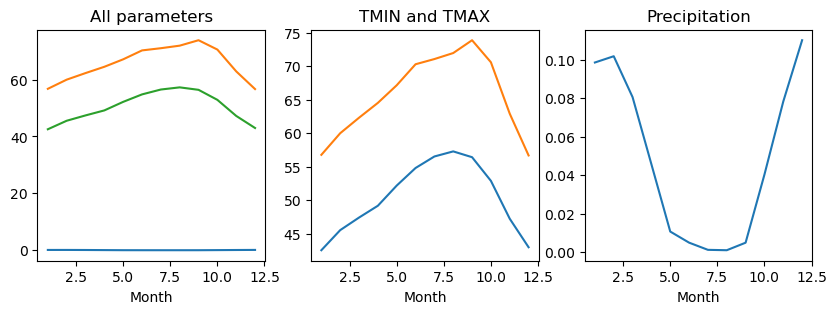

In [142]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))

#All plots
ax[0].set(title='All parameters')
ax[0].plot(weather_table)
ax[0].set_xlabel('Month')

#Only TMIN and TMAX
ax[1].set(title = 'TMIN and TMAX')
ax[1].plot(weather_table[['TMIN','TMAX']])
ax[1].set_xlabel('Month')

#Only precipitation
ax[2].set(title = 'Precipitation')
ax[2].plot(weather_table['PRCP'])
ax[2].set_xlabel('Month')

So from the simple graphs above, we can safely say that there are montly variations in the values. Lets fill the missing values with the average value from that month.

In [155]:
cleaned_weather_data.fillna(cleaned_weather_data.groupby([cleaned_weather_data.index.month]
                                                         ).transform('mean'), inplace=True)

cleaned_weather_data.isna().sum()


PRCP    0
TMAX    0
TMIN    0
dtype: int64

Now all the missing values are filled, lets explore the data a bit more to properly understand the dataset.

Text(0, 0.5, '[mm]')

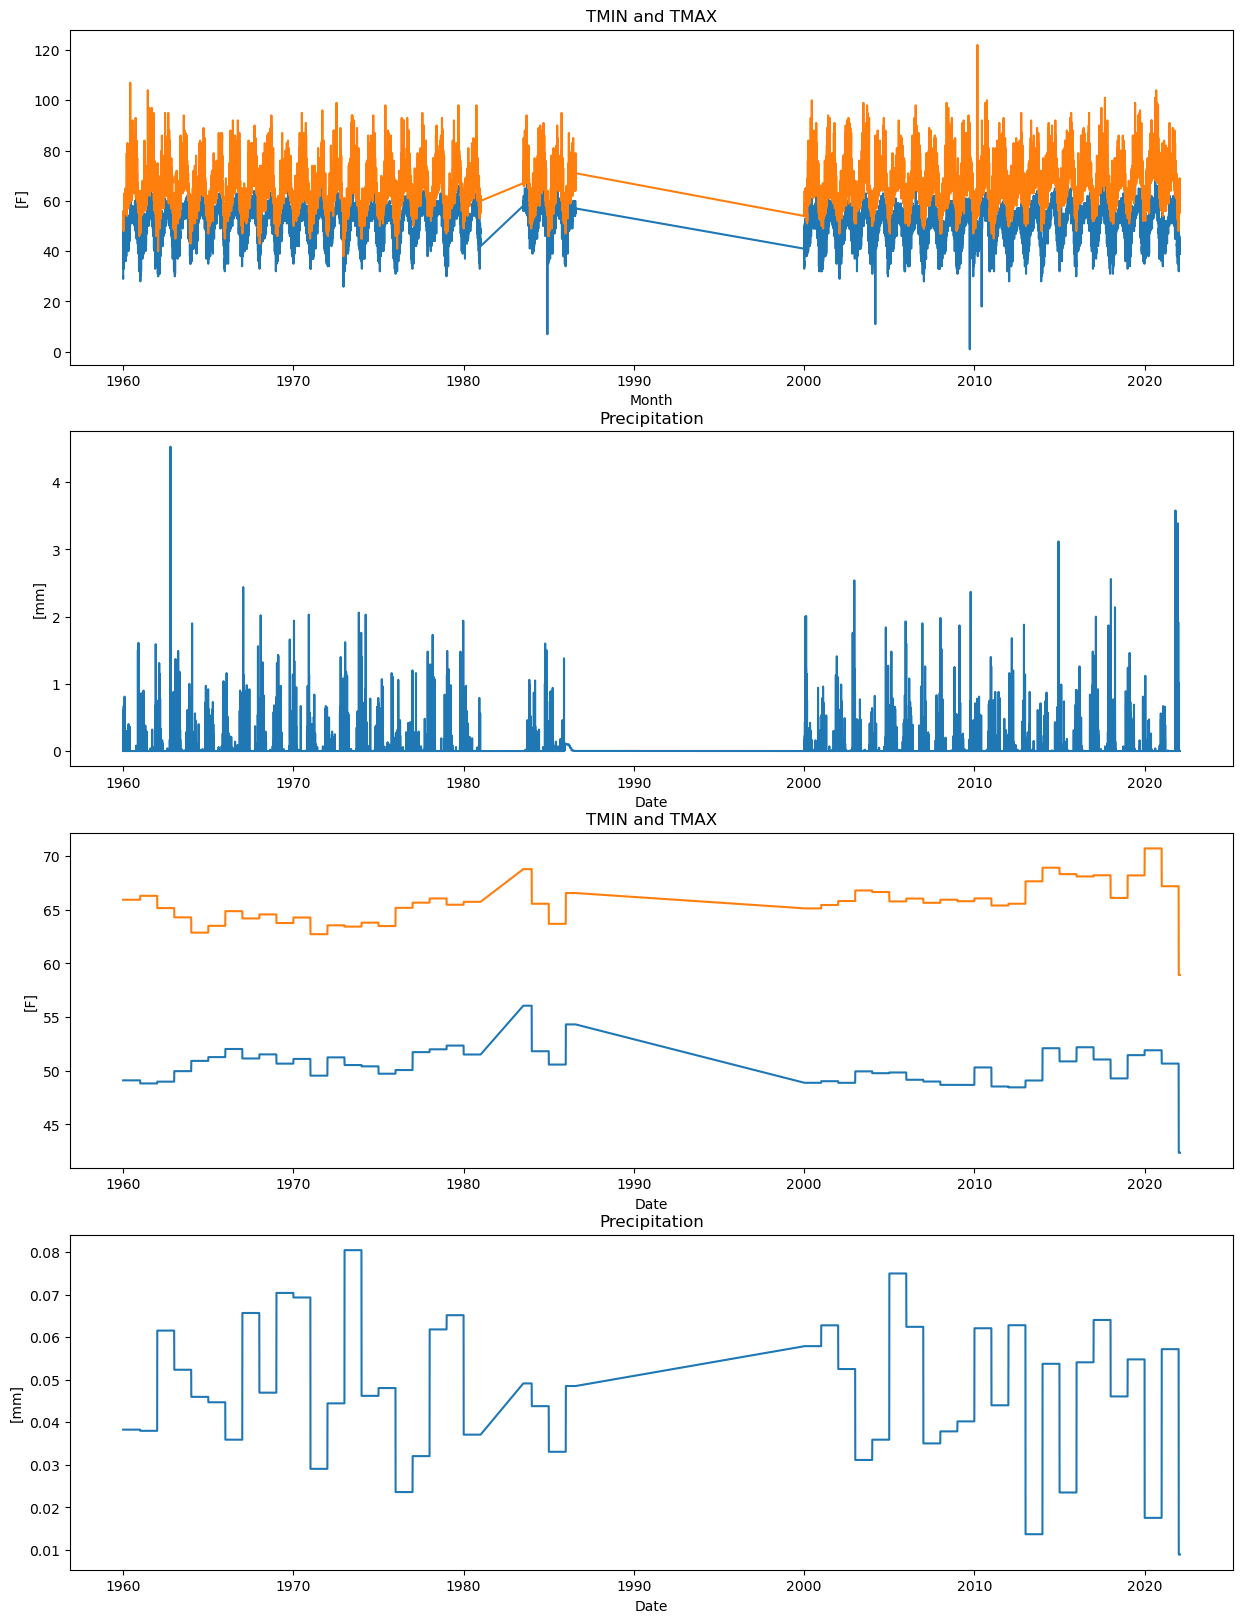

In [163]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

# Only TMIN and TMAX
ax[0].set(title='TMIN and TMAX')
ax[0].plot(cleaned_weather_data[['TMIN', 'TMAX']])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('[F]')

# Only precipitation
ax[1].set(title='Precipitation')
ax[1].plot(cleaned_weather_data['PRCP'])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('[mm]')

# Plot over every year for TMIN and TMAX
ax[2].set(title='TMIN and TMAX')
ax[2].plot(cleaned_weather_data[['TMIN', 'TMAX']].groupby(
    cleaned_weather_data.index.year).transform('mean'))
ax[2].set_xlabel('Date')
ax[2].set_ylabel('[F]')

#Plot for every year for Precipitation
ax[3].set(title='Precipitation')
ax[3].plot(cleaned_weather_data['PRCP'].groupby(cleaned_weather_data.index.year).transform('mean'))
ax[3].set_xlabel('Date')
ax[3].set_ylabel('[mm]')



There is quite a bit of yearly variation, especially for precipitation. Additionally, there is a segment in the data that have missing values, since the data is simply a straight line. Lets remove those!